In our previous article, we explored the basics of gradient descent and illustrated its workings using a simple linear regression example. In this continuation, we will dive deeper into the world of optimization by exploring different types of gradient descent, enhancing our optimization process with momentum, and finally advancing to the popular Adam optimizer. Each section will provide both the conceptual background and practical examples—including code and visualizations—to help you understand how these techniques improve upon basic gradient descent.

---

## 1. Different Types of Gradient Descent

Gradient descent can be implemented in several ways, each with its own advantages and trade-offs. Here we discuss three common variants:

### 1.1 Batch Gradient Descent

**Batch gradient descent** uses the entire dataset to compute the gradient for each update. Although this method provides a stable descent, it can be computationally expensive for large datasets.

### 1.2 Stochastic Gradient Descent (SGD)

**Stochastic gradient descent (SGD)** updates the parameters for every training example individually. This introduces a lot of noise (variance) into the parameter updates, which can sometimes help to escape local minima, but it may also lead to an erratic path toward convergence.

### 1.3 Mini-Batch Gradient Descent

**Mini-batch gradient descent** strikes a balance between batch and stochastic approaches by computing the gradient on small subsets (mini-batches) of the data. This typically speeds up convergence and smooths the update steps.

Below is an example that demonstrates mini-batch gradient descent using the same dummy dataset from our previous article:

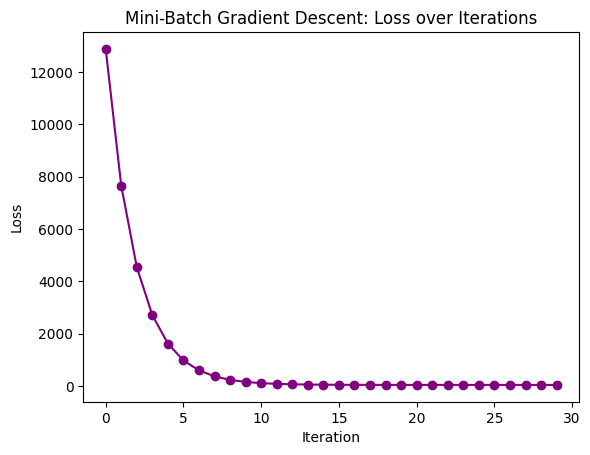

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Re-use the dummy dataset from the previous article
random.seed(46)
x = [num / 2 for num in range(20)]
rand_offset_y = [2 * (num / 2) + 4 + random.random() * 4 for num in range(20)]
np_x = np.array(x)
np_y_actual = np.array(rand_offset_y)

# Define our prediction and loss functions (using NumPy)
def np_make_prediction(x_array, m, b):
    return m * x_array + b

def np_calculate_loss(y_pred, y_actual):
    return np.sum((y_pred - y_actual) ** 2)

# Mini-batch gradient descent parameters
batch_size = 5
learning_rate = 0.0002
num_iterations = 30

# Initialize model parameters [m, b]
params = np.array([random.randint(1, 10), random.randint(1, 10)])
loss_history = []

def get_mini_batches(x_data, y_data, batch_size):
    indices = np.arange(len(x_data))
    np.random.shuffle(indices)
    for start_idx in range(0, len(x_data) - batch_size + 1, batch_size):
        excerpt = indices[start_idx:start_idx + batch_size]
        yield x_data[excerpt], y_data[excerpt]

def calculate_gradients(m, b, x_batch, y_batch):
    errors = (m * x_batch + b) - y_batch
    grad_m = 2 * np.sum(x_batch * errors)
    grad_b = 2 * np.sum(errors)
    return np.array([grad_m, grad_b])

# Run mini-batch gradient descent
for iteration in range(num_iterations):
    for x_batch, y_batch in get_mini_batches(np_x, np_y_actual, batch_size):
        grads = calculate_gradients(params[0], params[1], x_batch, y_batch)
        params = params - learning_rate * grads
    current_loss = np_calculate_loss(np_make_prediction(np_x, params[0], params[1]), np_y_actual)
    loss_history.append(current_loss)

# Plot loss history over iterations
plt.figure()
plt.plot(range(num_iterations), loss_history, marker='o', color='purple')
plt.title("Mini-Batch Gradient Descent: Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()



The plot above shows how the loss decreases over successive iterations when using mini-batch gradient descent.

---

## 2. Incorporating Momentum in Gradient Descent

While mini-batch gradient descent smooths out some of the noise, it can still struggle with slow convergence and oscillations in ravines. **Momentum** helps to accelerate updates by maintaining a velocity vector that accumulates past gradients.

### 2.1 How Momentum Works

The update rule with momentum modifies the standard gradient descent as follows:

$$
v_t = \gamma v_{t-1} + \alpha \nabla L(\theta_t)
$$

$$
\theta_{t+1} = \theta_t - v_t
$$

Here, \( \gamma \) is the momentum coefficient (commonly set around 0.9) and \( \alpha \) is the learning rate. The velocity term \( v_t \) builds up in directions with consistent gradients and helps overcome local oscillations.

### 2.2 Momentum in Action

Below is an example of gradient descent with momentum applied to our linear regression model. We will update the parameters using a velocity vector and plot the parameter trajectory.

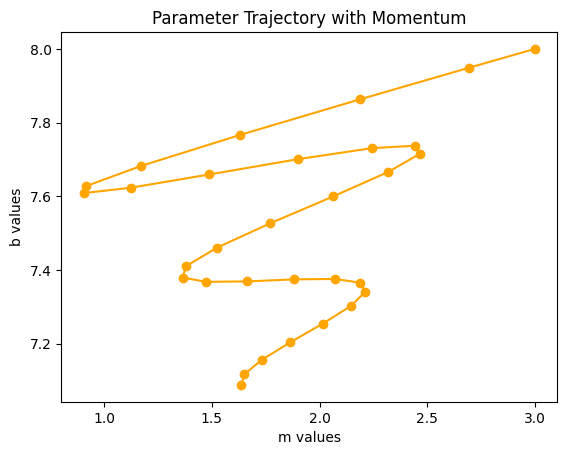

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters and velocity for momentum
params = np.array([random.randint(1, 10), random.randint(1, 10)], dtype=float)
velocity = np.array([0.0, 0.0])
momentum_gamma = 0.9
learning_rate = 0.0002
num_iterations = 30
trajectory = [params.copy()]

# Use the entire dataset (batch gradient descent) for simplicity in this example
def calculate_gradients_full(m, b, x_data, y_data):
    errors = (m * x_data + b) - y_data
    grad_m = 2 * np.sum(x_data * errors)
    grad_b = 2 * np.sum(errors)
    return np.array([grad_m, grad_b])

# Run gradient descent with momentum
for i in range(num_iterations):
    grads = calculate_gradients_full(params[0], params[1], np_x, np_y_actual)
    velocity = momentum_gamma * velocity + learning_rate * grads
    params = params - velocity
    trajectory.append(params.copy())

# Convert trajectory to numpy array for plotting
trajectory = np.array(trajectory)

# Plot parameter trajectory on a 2D plane
plt.figure()
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', linestyle='-', color='orange')
plt.title("Parameter Trajectory with Momentum")
plt.xlabel("m values")
plt.ylabel("b values")
plt.show()

The above example illustrates how momentum smooths the parameter updates, leading to a more stable and faster convergence.

---

## 3. Adam Optimization: Adaptive Moment Estimation

**Adam** (Adaptive Moment Estimation) is an optimization algorithm that combines the benefits of momentum and adaptive learning rates. It computes individual adaptive learning rates for different parameters based on estimates of the first and second moments of the gradients.

### 3.1 Adam’s Update Rules

Adam’s update equations are given by:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla L(\theta_t)
$$

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) \left(\nabla L(\theta_t)\right)^2
$$

Bias-corrected estimates are then calculated as:

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$$

$$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

Finally, the parameter update is:

$$
\theta_{t+1} = \theta_t - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

Where:  
- \( \beta_1 \) (typically 0.9) and \( \beta_2 \) (typically 0.999) control the decay rates for the moment estimates.  
- \( \epsilon \) is a small constant (e.g., \( 10^{-8} \)) to prevent division by zero.

### 3.2 Adam in Practice

The following code snippet demonstrates a simple implementation of Adam for our linear regression model.

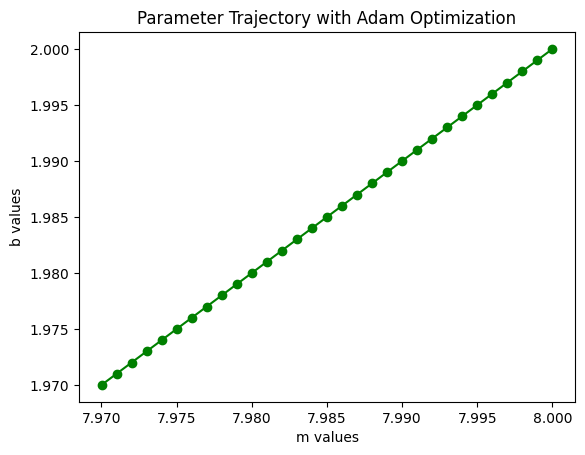

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters, first moment, and second moment variables
params = np.array([random.randint(1, 10), random.randint(1, 10)], dtype=float)
m_t = np.zeros(2)
v_t = np.zeros(2)
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
learning_rate = 0.001
num_iterations = 30
trajectory = [params.copy()]

def calculate_gradients_full(m, b, x_data, y_data):
    errors = (m * x_data + b) - y_data
    grad_m = 2 * np.sum(x_data * errors)
    grad_b = 2 * np.sum(errors)
    return np.array([grad_m, grad_b])

# Run Adam optimization
for t in range(1, num_iterations + 1):
    grads = calculate_gradients_full(params[0], params[1], np_x, np_y_actual)
    # Update biased first moment estimate
    m_t = beta1 * m_t + (1 - beta1) * grads
    # Update biased second raw moment estimate
    v_t = beta2 * v_t + (1 - beta2) * (grads ** 2)
    # Compute bias-corrected first moment estimate
    m_hat = m_t / (1 - beta1 ** t)
    # Compute bias-corrected second moment estimate
    v_hat = v_t / (1 - beta2 ** t)
    # Update parameters
    params = params - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    trajectory.append(params.copy())

trajectory = np.array(trajectory)

# Plot the parameter trajectory for Adam
plt.figure()
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', linestyle='-', color='green')
plt.title("Parameter Trajectory with Adam Optimization")
plt.xlabel("m values")
plt.ylabel("b values")
plt.show()

In this example, Adam quickly adapts the learning rates for each parameter, resulting in an efficient and often faster convergence compared to basic gradient descent and momentum-based methods.

---

## Conclusion

In this article, we extended our foundational understanding of gradient descent by:

- **Exploring Different Gradient Descent Variants:** We examined batch, stochastic, and mini-batch methods—each balancing trade-offs between stability and computational efficiency.
- **Integrating Momentum:** By incorporating a velocity term, momentum helps accelerate gradient descent and reduces oscillations, particularly in narrow valleys.
- **Advancing to Adam Optimization:** Adam leverages both momentum and adaptive learning rates, making it one of the most robust and popular optimization algorithms in modern machine learning.

These advanced techniques are essential tools in the optimization toolbox. They not only enhance convergence speed but also improve stability in training complex models, enabling you to tackle large-scale and noisy datasets with greater confidence.